# <span style='background:#f2bc74'>**Matthew Joel**  </span>


# Markov Chains

In this project lets explore *absorbing* Markov chains.

## Random Walk
Consider the following example of a random walk.  The possible states are $0,1,2,3,4$.
At state $2$, there is $\frac{1}{2}$ probability of leaving to the left, and $\frac{1}{2}$ probability of leaving to the right.
At state $3$, there is $\frac{1}{3}$ probability of leaving to the left, and $\frac{2}{3}$ probability of leaving to the right.
At state $4$, there is $\frac{1}{4}$ probability of leaving to the left, and $\frac{3}{4}$ probability of leaving to the right.
Once the states $0$ or $1$ are reached, then the random walk stays in that state.

The absorbing states are $0$ and $1$, and the transient states are $2$, $3$, and $4$.

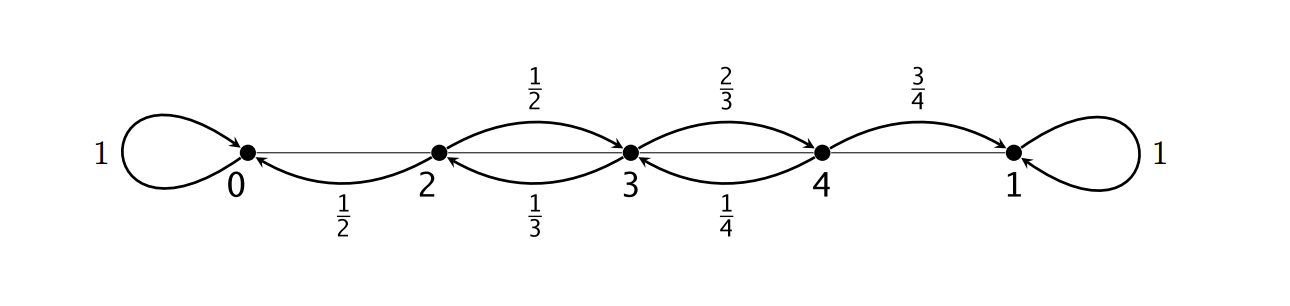


As with an ergodic Markov chain, we can construct the *transition matrix $P$*, where
$$p_{i,j} = \text{probability of transitioning from state $j$ to state $i$}.$$


In [1]:
from sympy import *
init_printing()

Let's construct the transition matrix $P$ for the random walk given above.

In [2]:
P=Matrix([
    [1,0,1/2,0,0],
    [0,1,0,0,3/4],
    [0,0,0,1/3,0],
    [0,0,1/2,0,1/4],
    [0,0,0,2/3,0]
])
P

⎡1  0  0.5          0           0  ⎤
⎢                                  ⎥
⎢0  1   0           0          0.75⎥
⎢                                  ⎥
⎢0  0   0   0.333333333333333   0  ⎥
⎢                                  ⎥
⎢0  0  0.5          0          0.25⎥
⎢                                  ⎥
⎣0  0   0   0.666666666666667   0  ⎦

As with all Markov chains, given an initial probability distribution $\mathbf{x}_0$ of states, we can compute the probability distribution $\mathbf{x}_i$ of states at the $i$th step of the Markov chain by computing $P^i \mathbf{x}_0$.

When starting at state $2$ (ie, the probability of state $2$ in the initial distribution is $1$), let's find the probability of being in state $0$ after $1$ step, $5$ steps, $20$ steps, and $100$ steps.

In [3]:
x0=Matrix([
    [0,0,1,0,0]
]).T
x0

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [4]:
P*x0

⎡0.5⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢0.5⎥
⎢   ⎥
⎣ 0 ⎦

probability of being in state  0  after  1 step: 50%

In [5]:
(P**5)*x0

⎡0.611111111111111 ⎤
⎢                  ⎥
⎢0.333333333333333 ⎥
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎢0.0555555555555556⎥
⎢                  ⎥
⎣        0         ⎦

probability of being in state  0  after  5 steps: 61.1%

In [6]:
(P**20)*x0

⎡ 0.624993649342072 ⎤
⎢                   ⎥
⎢ 0.374980948026216 ⎥
⎢                   ⎥
⎢8.46754390421514e-6⎥
⎢                   ⎥
⎢         0         ⎥
⎢                   ⎥
⎣1.69350878084303e-5⎦

probability of being in state  0  after  20 steps: 62.5%

In [7]:
(P**100)*x0

⎡       0.625        ⎤
⎢                    ⎥
⎢       0.375        ⎥
⎢                    ⎥
⎢6.96477784549268e-25⎥
⎢                    ⎥
⎢         0          ⎥
⎢                    ⎥
⎣1.39295556909854e-24⎦

probability of being in state  0  after  100 steps: 62.5%

Thus the probability of being in state $0$ in the $i$th step is tending towards as $i\to\infty$ is $ 5/8 = 62.5\%$.

For an ergodic Markov chain, the transition matrix $P$ has $1$ as an eigenvalue of multiplicity $1$.
From the corresponding eigenspace we obtained the stationary distribution.

Below we have proven that that the transition matrix P has  1  as an eigenvalue. 1's algebraic multiplicity is 2, since it appears twice. The corresponding eigenvectors come from from the absorbing states of 0 and 1.

In [8]:
P.eigenvals()

{-0.577350269189626: 1, -1.78035183690266e-66: 1, 0.577350269189626: 1, 1.0: 2
}

In [9]:
P.eigenvects()

⎡⎛        ⎡⎡1.0⎤⎤⎞  ⎛        ⎡⎡ 0 ⎤⎤⎞  ⎛                       ⎡⎡0.11207193402
⎢⎜        ⎢⎢   ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟  ⎜                       ⎢⎢             
⎢⎜        ⎢⎢ 0 ⎥⎥⎟  ⎜        ⎢⎢1.0⎥⎥⎟  ⎜                       ⎢⎢ 0.3362158020
⎢⎜        ⎢⎢   ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟  ⎜                       ⎢⎢             
⎢⎜1.0, 1, ⎢⎢ 0 ⎥⎥⎟, ⎜1.0, 1, ⎢⎢ 0 ⎥⎥⎟, ⎜-0.577350269189626, 1, ⎢⎢-0.3535533905
⎢⎜        ⎢⎢   ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟  ⎜                       ⎢⎢             
⎢⎜        ⎢⎢ 0 ⎥⎥⎟  ⎜        ⎢⎢ 0 ⎥⎥⎟  ⎜                       ⎢⎢0.61237243569
⎢⎜        ⎢⎢   ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟  ⎜                       ⎢⎢             
⎣⎝        ⎣⎣ 0 ⎦⎦⎠  ⎝        ⎣⎣ 0 ⎦⎦⎠  ⎝                       ⎣⎣-0.7071067811

1007 ⎤⎤⎞  ⎛                          ⎡⎡  0.254000254000381  ⎤⎤⎞  ⎛            
     ⎥⎥⎟  ⎜                          ⎢⎢                     ⎥⎥⎟  ⎜            
6302 ⎥⎥⎟  ⎜                          ⎢⎢ -0.762000762001143  ⎥⎥⎟  ⎜            
     ⎥⎥⎟  ⎜                          ⎢⎢            

## Coin Flip

Consider repeatedly flipping a fair coin (meaning that the probability of heads equals the probability of tails (which is $\frac{1}{2}$), and that different coin flips are independent).
Let's find the probability that the consecutive sequence HHH appears before the sequence HTH.

We will model this problem by constructing an absorbing Markov chain with 2 absorbing states and 4 transient states.
Computing the probabilities will be done by calculating $\lim_{i\to\infty} P^i$ using $N$.
Since we're interested in seeing when we obtain three heads in a row, we should consider the following states:
* the last flip was not a head (we'll need to modify this a bit).
* the last flip was a head, but the previous flip was not a head.
* the last two flips were heads.

We also need to track whether we'll encounter the sequence HTH.  Thus we also need a state
* the last two flips were heads then tails.

To distinguish this state from the first transient state listed, we'll change that state to be
* the last flip was not a head, and the previous flip was also not a head. (Note that we're not just saying TT, since we might be at the beginning of the sequence and there might not be flips.)

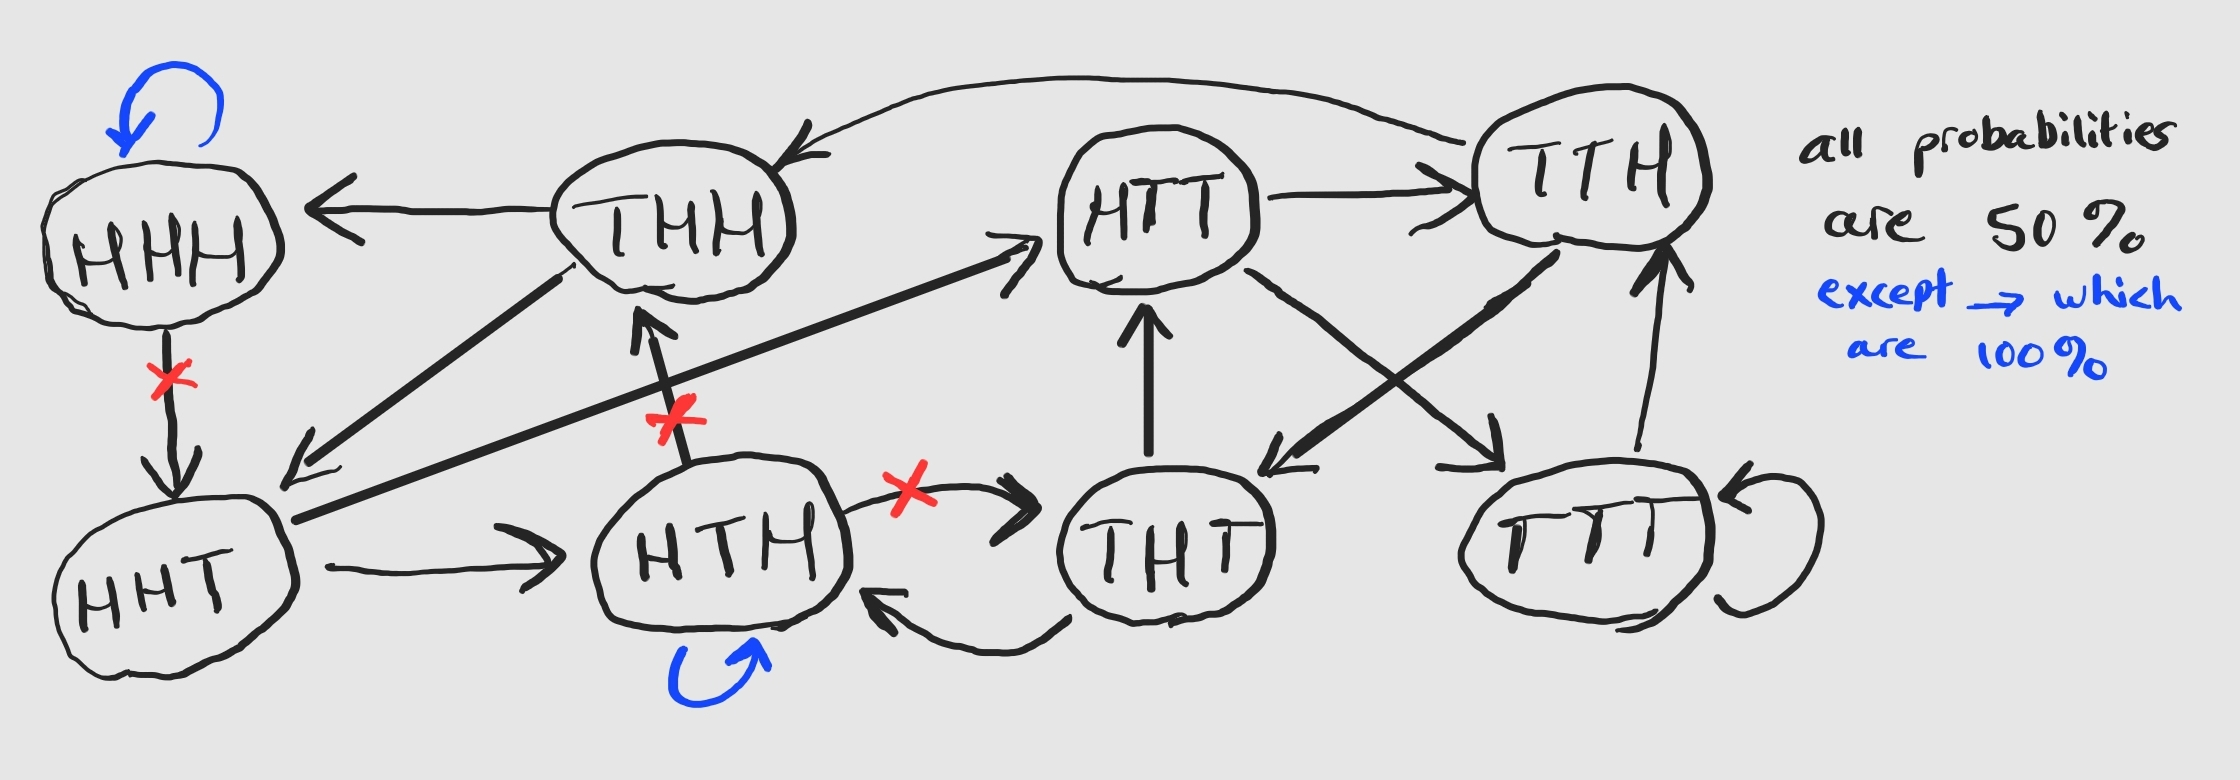

In [10]:
#transition matrix
P1=Matrix([
    [1,0,0,.5,0,0,0,0],
    [0,1,.5,0,0,.5,0,0],
    [0,0,0,.5,0,0,0,0],
    [0,0,0,0,0,0,.5,0],
    [0,0,.5,0,0,.5,0,0],
    [0,0,0,0,0,0,.5,0],
    [0,0,0,0,.5,0,0,.5],
    [0,0,0,0,.5,0,0,.5]
])
P1

⎡1  0   0   0.5   0    0    0    0 ⎤
⎢                                  ⎥
⎢0  1  0.5   0    0   0.5   0    0 ⎥
⎢                                  ⎥
⎢0  0   0   0.5   0    0    0    0 ⎥
⎢                                  ⎥
⎢0  0   0    0    0    0   0.5   0 ⎥
⎢                                  ⎥
⎢0  0  0.5   0    0   0.5   0    0 ⎥
⎢                                  ⎥
⎢0  0   0    0    0    0   0.5   0 ⎥
⎢                                  ⎥
⎢0  0   0    0   0.5   0    0   0.5⎥
⎢                                  ⎥
⎣0  0   0    0   0.5   0    0   0.5⎦

In [11]:
Q1=P1[2:8,2:8]
Q1

⎡ 0   0.5   0    0    0    0 ⎤
⎢                            ⎥
⎢ 0    0    0    0   0.5   0 ⎥
⎢                            ⎥
⎢0.5   0    0   0.5   0    0 ⎥
⎢                            ⎥
⎢ 0    0    0    0   0.5   0 ⎥
⎢                            ⎥
⎢ 0    0   0.5   0    0   0.5⎥
⎢                            ⎥
⎣ 0    0   0.5   0    0   0.5⎦

In [12]:
I1=eye(6)
I1

⎡1  0  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  0  1  0  0  0⎥
⎢                ⎥
⎢0  0  0  1  0  0⎥
⎢                ⎥
⎢0  0  0  0  1  0⎥
⎢                ⎥
⎣0  0  0  0  0  1⎦

In [13]:
N1=(I1-Q1)**(-1)
N1

⎡1.2  0.6  0.4  0.2  0.4  0.4⎤
⎢                            ⎥
⎢0.4  1.2  0.8  0.4  0.8  0.8⎥
⎢                            ⎥
⎢0.8  0.4  1.6  0.8  0.6  0.6⎥
⎢                            ⎥
⎢0.4  0.2  0.8  1.4  0.8  0.8⎥
⎢                            ⎥
⎢0.8  0.4  1.6  0.8  1.6  1.6⎥
⎢                            ⎥
⎣0.8  0.4  1.6  0.8  0.6  2.6⎦

In [14]:
R1=P1[0:2,2:8]
R1

⎡ 0   0.5  0   0   0  0⎤
⎢                      ⎥
⎣0.5   0   0  0.5  0  0⎦

In [15]:
lim2=R1*N1
lim2

⎡0.2  0.6  0.4  0.2  0.4  0.4⎤
⎢                            ⎥
⎣0.8  0.4  0.6  0.8  0.6  0.6⎦

The top row represents the probability of landing a HHH from a given state (the column), and the bottom row represents the probability of landing a HTH from a given state. If we sum the rows horizontally, we see $row_0(HHH)= 0.2+0.6+0.4+0.2+0.4+0.4=2.2$, while $row_1(HTH)=3.8$. Thus HTH is more likely. Now we can add the row totals, $2.2 + 3.8 = 6$. From here, lets divide a rows individual total by the row total: $2.2/6=0.366$. Therefore, the probability that the consecutive sequence HHH appears before the sequence HTH is $36.6$%.